In [167]:
import pandas as pd
import numpy as np



In [168]:
# Import studnets_df, clubs, courses f15, s16

students_df = pd.read_csv('data/students.csv')
clubs_df = pd.read_csv('data/clubs.csv')
courses_df = pd.read_csv('data/courses.csv')
f15_df = pd.read_csv('data/f15.csv')
s16_df = pd.read_csv('data/s16.csv')
careers_df = pd.read_csv('data/careers.csv')

# Display each df.

print(students_df.columns)
print(clubs_df.columns)
print(courses_df.columns)
print(f15_df.columns)
print(s16_df.columns)
print(careers_df.columns)

Index(['id', 'name'], dtype='object')
Index(['student_id', 'club'], dtype='object')
Index(['id', 'name'], dtype='object')
Index(['student_id', 'course', 'grade', 'points_earned', 'max_points'], dtype='object')
Index(['student_id', 'course', 'grade', 'points_earned', 'max_points'], dtype='object')
Index(['id', 'career'], dtype='object')


1. Use merging to produce a DataFrame showing which students belong to which clubs.

2. In Question 1, did you perform a one-to-one, many-to-one, or many-to-many merge? Why?

3. Are there any students who are not in any clubs? If so, how many? Show their names and student ID.

4. Use merging to produce a DataFrame showing the names of courses that students enrolled in.

5. In Question 4, did you perform a one-to-one, many-to-one, or many-to-many merge? Why?

6. Ignoring withdrawals, for the whole F15/S16 academic year, what is the name of the course that is
probably the hardest? Which is probably the easiest?

7. Did any students not enroll in any course during the whole F15/S16 academic year? Who?

8. What is the name of the student who scored the the most cumulative points in the whole F15/S16
academic year?


9. Over the whole F15/S16 academic year, what career was most common among students taking 1215?


10.  List the names of students who went into manufacturing

In [169]:
#1. Use merging to produce a DataFrame showing which students belong to which clubs.

df_students_clubs = pd.merge(students_df, clubs_df, left_on='id', right_on='student_id')
df_students_clubs.head(10)

,id,name,student_id,club
0,7798814,Keith,7798814,CS Club
1,2149193,Denise,2149193,CS Club
2,5062031,Edward,5062031,Cryptocurrency Club
3,7361386,Jeffery,7361386,Robotics Club
4,5484525,Spencer,5484525,Entrepreneur Club
5,5849744,Britney,5849744,CS Club
6,5849744,Britney,5849744,Robotics Club
7,1303047,Jack,1303047,Entrepreneur Club
8,1303047,Jack,1303047,Robotics Club
9,1515716,Levi,1515716,Robotics Club


> 2. In Question 1, did you perform a one-to-one, many-to-one, or many-to-many merge? Why?

A one-to-many was performed because the student ID unique in the students table. And The tudnet could belong to multiple clubs, so it is a one-to-many merge.

In [170]:
# 3. Are there any students who are not in any clubs? If so, how many? Show their names and student ID.

df_students_clubs = pd.merge(students_df, clubs_df, left_on='id', right_on='student_id', how='left')

df_null_clubs = df_students_clubs[df_students_clubs['club'].isnull()]

print('Count of students not in a club:', df_null_clubs.shape[0])
df_null_clubs.head()

Count of students not in a club: 227


,id,name,student_id,club
11,3822320,Jon,NaN,NaN
12,9548347,Jennifer,NaN,NaN
13,5131111,Leah,NaN,NaN
14,2227757,Grace,NaN,NaN
15,1802931,Troy,NaN,NaN


In [171]:
courses_df.head()

,id,name
0,1001,Computing &Quantitative Reason
1,1002,The Outer Limits of Reasoning
2,1003,Exploring Robotics
3,1050,Intro to Computer Applications
4,1115,Intro to JAVA Programming


In [172]:
# 5.4. Use merging to produce a DataFrame showing the names of courses that students enrolled in.

# df_clubs_students = pd.merge(students_df, courses_df, left_on='id', right_on='student_id', how='right')

# df_clubs_students = df_clubs_students[df_clubs_students['name'].isnull()]

# df_clubs_students.head()

# Trying now with f15, f16

f15_df.head()


,student_id,course,grade,points_earned,max_points
0,7798814,1600,a,4,4
1,7798814,1002,a,4,4
2,2149193,1400,a,4,4
3,2149193,1003,b,3,4
4,2149193,1580,a,4,4


In [173]:
s16_df.head()

,student_id,course,grade,points_earned,max_points
0,7798814,2210,a,4,4
1,7798814,1215,b,3,4
2,2149193,1600,a,4,4
3,2149193,1170,b,3,4
4,2149193,1597,a,4,4


In [174]:
unique_courses_s16 = s16_df['course'].unique()
unique_courses_f15 = f15_df['course'].unique()

print('Unique courses in s16:', unique_courses_s16)
print('Unique courses in f15:', unique_courses_f15)

Unique courses in s16: [2210 1215 1600 1170 1597 1115 1530 1003 1400 1001 1050 1002 1590 1580]
Unique courses in f15: [1600 1002 1400 1003 1580 1597 1590 1050 1530 1115 1215 1170 1001]


In [175]:
# Now lets join the unique courses with the courses names:
# Select courses where the course code is in the unique courses list.

all_unique_courses = np.concatenate((unique_courses_s16, unique_courses_f15), axis=0)
all_unique_courses = list(np.unique(all_unique_courses))
print(all_unique_courses)
unique_courses_df = courses_df[courses_df['id'].isin(all_unique_courses)]
print("All courses that have students enrolled:")
unique_courses_df.head(10000)

[1001, 1002, 1003, 1050, 1115, 1170, 1215, 1400, 1530, 1580, 1590, 1597, 1600, 2210]
All courses that have students enrolled:


,id,name
0,1001,Computing &Quantitative Reason
1,1002,The Outer Limits of Reasoning
2,1003,Exploring Robotics
3,1050,Intro to Computer Applications
4,1115,Intro to JAVA Programming
5,1170,Java for Programmers
6,1215,Intro to Programming in Python
7,1400,Elementary Robotics
8,1530,Electronic Commerce
9,1580,Computer Mangement Games


In [176]:
# Using merge:

all_courses = pd.concat([f15_df, s16_df], axis=0)
all_courses.head()

courses_df.head()


,id,name
0,1001,Computing &Quantitative Reason
1,1002,The Outer Limits of Reasoning
2,1003,Exploring Robotics
3,1050,Intro to Computer Applications
4,1115,Intro to JAVA Programming


In [177]:
df_enrolled_courses = pd.merge(courses_df, all_courses, left_on='id', right_on='course', how="inner")
df_enrolled_courses.head(1000)

,id,name,student_id,course,grade,points_earned,max_points
0,1001,Computing &Quantitative Reason,2227757,1001,a,4,4
1,1001,Computing &Quantitative Reason,1017158,1001,a,4,4
2,1001,Computing &Quantitative Reason,9614903,1001,c,2,4
3,1001,Computing &Quantitative Reason,3461094,1001,f,0,4
4,1001,Computing &Quantitative Reason,8416967,1001,a,4,4
...,...,...,...,...,...,...,...
995,1215,Intro to Programming in Python,8131408,1215,a,4,4
996,1215,Intro to Programming in Python,4038541,1215,b,3,4
997,1215,Intro to Programming in Python,7383506,1215,d,1,4
998,1215,Intro to Programming in Python,3446132,1215,b,3,4


In [178]:
# Unique course names:
unique_courses = df_enrolled_courses['name'].unique()
print('Unique courses:', unique_courses)

Unique courses: ['Computing &Quantitative Reason' 'The Outer Limits of Reasoning'
 'Exploring Robotics' 'Intro to Computer Applications'
 'Intro to JAVA Programming' 'Java for Programmers'
 'Intro to Programming in Python' 'Elementary Robotics'
 'Electronic Commerce' 'Computer Mangement Games'
 'Management Information Systems' 'New Media and Business'
 'Intro Multi Comput' 'Discrete Structure']


> In Question 4, did you perform a one-to-one, many-to-one, or many-to-many merge? Why?

In Question 4, I performed a one-to-many merge. This is because it was involved merging a dataframe containing unique courses with another dataframe containing duplicated student's course dataframe records.

<AxesSubplot:>

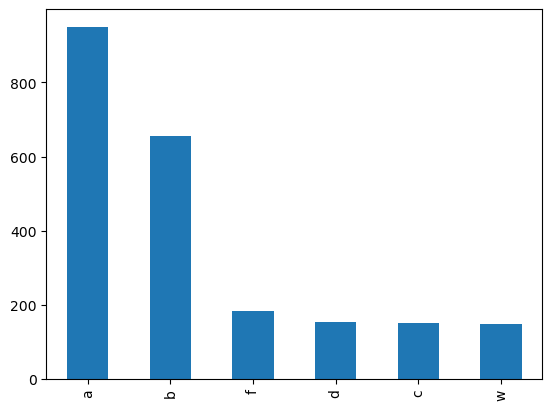

In [179]:
# 6.  Ignoring withdrawals, for the whole F15/S16 academic year, what is the name of the course that is
# probably the hardest? Which is probably the easiest?

# Show bar chart of grade distribution from `all_courses`

df_enrolled_courses['grade'].value_counts().plot(kind='bar')

In [180]:
# For this we should be comparing the count of a's and w's grouped by course name:

df_enrolled_courses.groupby('name')['grade'].value_counts()

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')


print('Count of courses', len(df_enrolled_courses.groupby('name')))
print_full(df_enrolled_courses.groupby('name')['grade'].value_counts())

Count of courses 14
name                            grade
Computer Mangement Games        a        61
                                b        46
                                c        19
                                d        11
                                f        11
                                w        10
Computing &Quantitative Reason  a        74
                                b        40
                                d        15
                                f        14
                                c        13
                                w         7
Discrete Structure              a        29
                                b        29
                                c        10
                                f         6
                                d         4
                                w         4
Electronic Commerce             a        71
                                b        55
                                f        13
                  

In [181]:
# Lets review A and then F grades for each course:

a_count_courses = df_enrolled_courses[df_enrolled_courses['grade'] == 'a'].groupby('name')
f_count_courses = df_enrolled_courses[df_enrolled_courses['grade'] == 'f'].groupby('name')

print('a count max', a_count_courses.count().max())

a_count_courses.count()

a count max id               86
student_id       86
course           86
grade            86
points_earned    86
max_points       86
dtype: int64


,id,student_id,course,grade,points_earned,max_points
name,,,,,,
Computer Mangement Games,61,61,61,61,61,61
Computing &Quantitative Reason,74,74,74,74,74,74
Discrete Structure,29,29,29,29,29,29
Electronic Commerce,71,71,71,71,71,71
Elementary Robotics,70,70,70,70,70,70
Exploring Robotics,67,67,67,67,67,67
Intro Multi Comput,70,70,70,70,70,70
Intro to Computer Applications,52,52,52,52,52,52
Intro to JAVA Programming,66,66,66,66,66,66


In [182]:

print('b count max', f_count_courses.count().max())

f_count_courses.count()

b count max id               18
student_id       18
course           18
grade            18
points_earned    18
max_points       18
dtype: int64


,id,student_id,course,grade,points_earned,max_points
name,,,,,,
Computer Mangement Games,11,11,11,11,11,11
Computing &Quantitative Reason,14,14,14,14,14,14
Discrete Structure,6,6,6,6,6,6
Electronic Commerce,13,13,13,13,13,13
Elementary Robotics,12,12,12,12,12,12
Exploring Robotics,15,15,15,15,15,15
Intro Multi Comput,18,18,18,18,18,18
Intro to Computer Applications,18,18,18,18,18,18
Intro to JAVA Programming,10,10,10,10,10,10


> 6. Ignoring withdrawals, for the whole F15/S16 academic year, what is the name of the course that is
probably the hardest? Which is probably the easiest?


The `Outer Limits of Reasoning` seems to be the easiest course given that it has the largest share of `a` rates.

The hardest course is probably the `The Outer Limits of Reasoning` given that it has the largest share of `f` rates.



In [183]:
# 7. Did any students not enroll in any course during the whole F15/S16 academic year? Who?

# Strategy: Find where `students_id` not in `df_enrolled_courses`.

unique_courses_s16 = s16_df['student_id'].unique()
unique_courses_f15 = f15_df['student_id'].unique()

all_unique_students = np.concatenate((unique_courses_s16, unique_courses_f15), axis=0)
all_unique_students = list(np.unique(all_unique_students))
print(all_unique_students)

# Search where students id is not in the unique students list:
unique_students_df = students_df[~students_df['id'].isin(all_unique_students)]
unique_students_df.head(1000)


[1015901, 1017158, 1017481, 1058891, 1106245, 1106704, 1115483, 1129796, 1134931, 1146311, 1177208, 1190341, 1191185, 1218109, 1234706, 1263404, 1270178, 1284951, 1287073, 1297598, 1303047, 1308743, 1329591, 1334205, 1344514, 1347561, 1371517, 1406859, 1437468, 1438008, 1505313, 1515716, 1527536, 1538582, 1544961, 1602747, 1615394, 1644129, 1731969, 1739486, 1797815, 1802931, 1822841, 1824962, 1837150, 1850316, 1863793, 1881759, 1921982, 1922319, 1932759, 1937419, 1952624, 1953047, 1961648, 1984756, 2066836, 2068478, 2075201, 2075291, 2093682, 2099494, 2106032, 2130550, 2149193, 2155099, 2182653, 2207639, 2227757, 2274224, 2298001, 2334159, 2357864, 2359572, 2361191, 2386128, 2404951, 2414216, 2415477, 2423417, 2451072, 2451162, 2460633, 2469246, 2472168, 2520704, 2559908, 2573777, 2609478, 2668119, 2678484, 2680945, 2681971, 2688149, 2717886, 2736273, 2840545, 2891900, 2902638, 2931679, 2950347, 3001761, 3005735, 3033551, 3106402, 3142459, 3173903, 3201900, 3207529, 3212134, 3252006, 

,id,name
420,9224256,Ron


> Ron was not enrolled in any course during the whole F15/S16 academic year.


In [184]:
# 8. What is the name of the student who scored the the most cumulative points in the whole F15/S16
# academic year?

# 8.1. Find the cumulative score of each students_df
sorted_cum_grades = df_enrolled_courses.groupby('student_id')['points_earned'].sum().sort_values(ascending=False)
print(sorted_cum_grades)

max_scorers = [2149193, 4814246, 1344514]

# 8.2. Find the student with the highest cumulative score
student_max_score = students_df[students_df['id'].isin(max_scorers)]
student_max_score.head(5)


student_id
2149193    22
4814246    22
1344514    22
8854136    21
7871397    21
           ..
8485972     4
4201392     4
6721357     2
2451162     1
4312766     0
Name: points_earned, Length: 493, dtype: int64


,id,name
1,2149193,Denise
103,4814246,Sharon
369,1344514,Ivan


In [185]:
# 9. Over the whole F15/S16 academic year, what career was most common among students taking 1215?

# 9.1. Find the students taking 1215

students_1215 = df_enrolled_courses[df_enrolled_courses['course'] == 1215]
unique_1215_students = students_1215['student_id'].unique()
print(unique_1215_students)
students_1215.head(1000)

[3822320 2227757 1017158 9614903 4780951 8131408 4038541 7383506 3446132
 3600317 4447032 3759364 7119330 4828934 9282994 9432884 6185763 4904852
 3370477 2668119 5060866 4129610 4529160 9400750 7095861 9139062 2469246
 7871397 6721357 3926663 4472718 6936402 1406859 3260499 3252006 1015901
 6990591 2681971 2451072 5060283 3595083 5842272 7539433 2451162 3335236
 5233223 9995632 2609478 9178444 2717886 9231816 2359572 3106402 9356661
 4746616 2414216 8003219 2931679 8554385 5627556 9086041 4246631 7323377
 3514530 6056123 8802041 7267445 7128923 1822841 7540671 6642433 6080795
 1344514 4911245 8422895 9430085 8294536 8169026 9210195 3528815 8402561
 9611743 6594041 9473037 5204429 7624676 3001761 7808748 1284951 2736273
 8119403 2334159 6260547 3934148 3865969 3558345 8117204 5403202 4401260
 1058891 3304601 7337741 2155099 4912478 6283185 7798814 1134931 5851717
 5751616 7486193 6904743 9494873 6042176 2207639 8121331 6705283 8441203
 8124289 4436208 7078702 5554120 6940518 6641751 35

,id,name,student_id,course,grade,points_earned,max_points
990,1215,Intro to Programming in Python,3822320,1215,a,4,4
991,1215,Intro to Programming in Python,2227757,1215,a,4,4
992,1215,Intro to Programming in Python,1017158,1215,b,3,4
993,1215,Intro to Programming in Python,9614903,1215,c,2,4
994,1215,Intro to Programming in Python,4780951,1215,b,3,4
...,...,...,...,...,...,...,...
1147,1215,Intro to Programming in Python,3541059,1215,a,4,4
1148,1215,Intro to Programming in Python,4730188,1215,f,0,4
1149,1215,Intro to Programming in Python,5735796,1215,a,4,4
1150,1215,Intro to Programming in Python,5261160,1215,b,3,4


In [186]:
# 9.2 Find the career of the students taking 1215

# students_in_1215 = students_df[students_df['id'].isin(unique_1215_students)]
# students_in_1215.head(1000)

# 9.3 Find the most common career among students taking 1215

students_careers = careers_df[careers_df['id'].isin(unique_1215_students)]
students_careers.head(1000)

# students_careers = careers_df[careers_df['id'].isin(unique_1215_students)]
# students_careers.head(1000)
# students_careers = careers_df[careers_df['student_id'].isin(unique_1215_students)]


,id,career
0,7798814,publishing
8,3822320,ecommerce
11,2227757,consulting
14,1134931,security
16,1017158,ecommerce
...,...,...
477,8776232,finance
479,7337741,ecommerce
484,2155099,security
486,4912478,startup


Most common career among students taking 1215: gamedev


<AxesSubplot:>

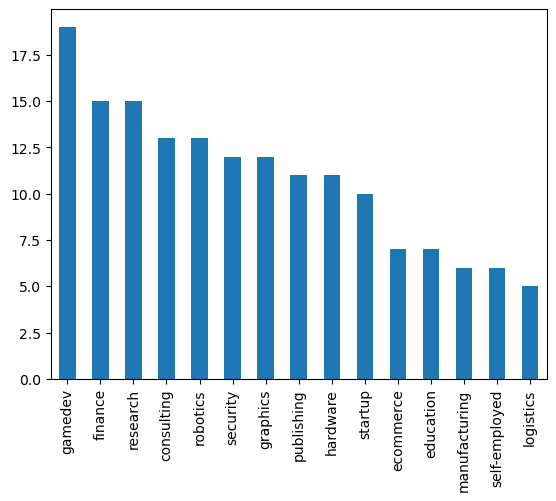

In [187]:
# 9.3 Find th most common career among students taking 1215

print('Most common career among students taking 1215:', students_careers['career'].value_counts().idxmax())
students_careers['career'].value_counts().plot(kind='bar')


In [188]:

# 10. List the names of students who went into manufacturing.

# 10.1. Find the students who went into manufacturing

manufacturing_students = students_careers[students_careers['career'] == 'manufacturing'].merge(students_df)
print("============= Names of Students who went into manufacturing ==============")
print(list(manufacturing_students['name']))

manufacturing_students.head(1000)



============= Names of Students who went into manufacturing ==============
['Brandi', 'Dennis', 'Jerome', 'Alexandria', 'Sierra', 'Lori']


,id,career,name
0,4038541,manufacturing,Brandi
1,7383506,manufacturing,Dennis
2,1922319,manufacturing,Jerome
3,3106402,manufacturing,Alexandria
4,4746616,manufacturing,Sierra
5,7540671,manufacturing,Lori
